In [57]:
import h2o

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [59]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,2 days 19 hours 26 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_yananli_unsj3q
H2O cluster total nodes:,1
H2O cluster free memory:,1.016 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


## Import data and description

In [60]:
url = "http://coursera.h2o.ai/house_data.3487.csv"
data = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [61]:
data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7.1293e+09,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6.4141e+09,20141209T000000,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5.6315e+09,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2.4872e+09,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1.9544e+09,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7.23755e+09,20140512T000000,1.225e+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1.3214e+09,20140627T000000,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2.008e+09,20150115T000000,291850,3,1.5,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2.4146e+09,20150415T000000,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
3.7935e+09,20150312T000000,323000,3,2.5,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [62]:
data['year'] = data['date'].substring(0,4)
data['month'] = data['date'].substring(4,6)

In [63]:
data.describe()

Rows:21613
Cols:23




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
type,int,enum,int,int,real,int,int,real,int,int,int,int,int,int,int,int,int,real,real,int,int,enum,enum
mins,1000102.0,,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0,,
mean,4580301520.86,,540088.141767,3.3708416231,2.11475732198,2079.89973627,15106.9675658,1.49430898071,0.00754175727571,0.234303428492,3.40942951002,7.65687317818,1788.39069079,291.509045482,1971.0051358,84.4022579003,98077.9398047,47.5600525193,-122.213896405,1986.55249156,12768.4556517,,
maxs,9900000190.0,,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0,,
sigma,2876565571.31,,367127.196483,0.930061831147,0.770163157218,918.440897047,41420.5115151,0.539988895142,0.0865171977279,0.766317569274,0.650743046366,1.17545875697,828.090977652,442.575042677,29.3734108024,401.679240019,53.5050262575,0.138563710242,0.140828342381,685.391304253,27304.1796313,,
zeros,0,,0,13,10,0,0,0,21450,19489,0,0,0,13126,0,20699,0,0,0,0,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7129300520.0,20141013T000000,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,2014,10
1,6414100192.0,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.721,-122.319,1690.0,7639.0,2014,12
2,5631500400.0,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,2015,02


## Feature Engineering

In [64]:
# Take the maximum between yr_built and yr_renovated
data['yr_completed'] = (data['yr_built'] > data['yr_renovated']).ifelse(data['yr_built'],data['yr_renovated'])

# Convert some numerical variables to categorical ones
data['lat'] = data['lat'].ascharacter()
data['long'] = data['long'].ascharacter()
var = ['id', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'yr_completed', 'zipcode', 'lat', 'long', 'year', 'month', 'yr_completed']
for i in var:
    data[i] = data[i].asfactor()

In [65]:
# Check correlations between price and other numrical features

numVar = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_living15', 'sqft_lot15']
corMat = data[numVar].cor(na_rm = True)

In [66]:
corMat

price0,bedrooms0,bathrooms0,sqft_living0,sqft_lot0,floors0,sqft_living150,sqft_lot150
1,0.30835,0.525138,0.702035,0.0896609,0.256794,0.585379,0.0824472
0.30835,1,0.515884,0.576671,0.0317032,0.175429,0.391638,0.0292442
0.525138,0.515884,1,0.754665,0.0877397,0.500653,0.568634,0.0871754
0.702035,0.576671,0.754665,1,0.172826,0.353949,0.75642,0.183286
0.0896609,0.0317032,0.0877397,0.172826,1,-0.00520099,0.144608,0.718557
0.256794,0.175429,0.500653,0.353949,-0.00520099,1,0.279885,-0.0112692
0.585379,0.391638,0.568634,0.75642,0.144608,0.279885,1,0.183192
0.0824472,0.0292442,0.0871754,0.183286,0.718557,-0.0112692,0.183192,1


<function matplotlib.pyplot.show>

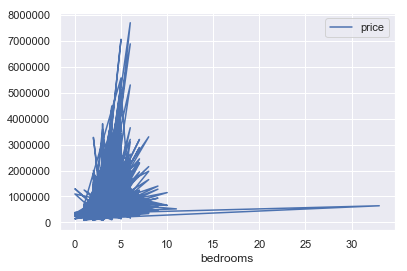

In [67]:
# Remove outliers

# Check relationship between price and #bedrooms
data.as_data_frame().plot("bedrooms","price")
plt.show

In [68]:
# Check the outlier which has a high #bedrooms but low price
data[data["bedrooms"] > 30]

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,yr_completed
2402100895,20140625T000000,640000,33,1.75,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,06,1947


In [69]:
# This record seems unreasonable, remove it
data = data[data["bedrooms"] < 30]

<function matplotlib.pyplot.show>

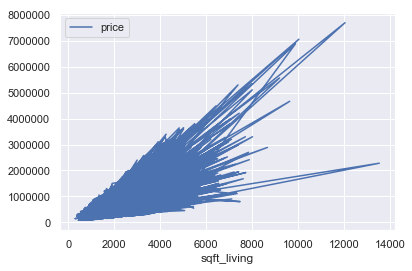

In [70]:
# Check relationship between price and sqft_living

#plt.scatter(data["sqft_living"], data["price"])
data.as_data_frame().plot("sqft_living","price")
plt.show

In [71]:
# Check the outlier which has a high sqft_living but low price
data[data["sqft_living"] > 13000]

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,yr_completed
1225069038,20140505T000000,2.28e+06,7,8,13540,307752,3,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2014,05,1999


In [72]:
# Other features seem fine, this as an outlier, remove it
data = data[data["sqft_living"] < 13500]

### Check enum cardinality

In [74]:
data.nlevels()  #enum cardinality

[21436,
 372,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 5,
 5,
 12,
 0,
 0,
 116,
 70,
 70,
 5034,
 752,
 0,
 0,
 2,
 12,
 116]

In [75]:
data.structure()

H2OFrame: 'py_75_sid_b751' 
Dimensions: 21611 obs. of 24 variables


$ id            :  Factor w/ 21436 level(s) "1000102","1200019","1200021","2800031","3600057","3600072","3800008","5200087","6200017","7200080","7200179","7400062","7600057","7600065","7600125","7600136","9000025","11200070","11200290","11200400","11300120","11500240","11500890","11501160","11501310","11501330","11510310","11510700","11520030","11520200","11520370","11520640","11900140","13001215","13001795","13001991","13002460","13002495","16000015","16000200","16000397","16000435","16000545","23500180","23500190","23500220","23520190","23520380","31000165","31200020","34000005","34001160","34001304","34001540","34001765","37000335","37000435","40000228","40000235","40000362","40000471","40000553","40000669","40001065","41000454","42000006","42000065","42000127","42000130","42000245","46100204","46100350","46100504","49000051","49500090","50300090","50300220","52000067","53500020","53500450","53500760","56000095","59000201","59000250","59000445","59500050","65000085","65000210","6500

$ date          :  Factor w/ 372 level(s) "20140502T000000","20140503T000000","20140504T000000","20140505T000000","20140506T000000","20140507T000000","20140508T000000","20140509T000000","20140510T000000","20140511T000000","20140512T000000","20140513T000000","20140514T000000","20140515T000000","20140516T000000","20140517T000000","20140518T000000","20140519T000000","20140520T000000","20140521T000000","20140522T000000","20140523T000000","20140524T000000","20140525T000000","20140526T000000","20140527T000000","20140528T000000","20140529T000000","20140530T000000","20140531T000000","20140601T000000","20140602T000000","20140603T000000","20140604T000000","20140605T000000","20140606T000000","20140607T000000","20140608T000000","20140609T000000","20140610T000000","20140611T000000","20140612T000000","20140613T000000","20140614T000000","20140615T000000","20140616T000000","20140617T000000","20140618T000000","20140619T000000","20140620T000000","20140621T000000","20140622T000000","20140623T000000","201

$ yr_built      :  Factor w/ 116 level(s) "1900","1901","1902","1903","1904","1905","1906","1907","1908","1909","1910","1911","1912","1913","1914","1915","1916","1917","1918","1919","1920","1921","1922","1923","1924","1925","1926","1927","1928","1929","1930","1931","1932","1933","1934","1935","1936","1937","1938","1939","1940","1941","1942","1943","1944","1945","1946","1947","1948","1949","1950","1951","1952","1953","1954","1955","1956","1957","1958","1959","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015" 
$ yr_renovated  :  Factor w/ 70 level(s) "0","1934","1940","1944","1945","1946","1948","1950","1951","1953","1954","1955","1956","1957","1958","1

$ lat           :  Factor w/ 5034 level(s) "47.1559","47.1593","47.1622","47.1647","47.1764","47.1775","47.1776","47.1795","47.1803","47.1808","47.184","47.1853","47.1879","47.1895","47.1896","47.19","47.1903","47.1913","47.1923","47.1924","47.1927","47.1928","47.1932","47.1934","47.1936","47.1937","47.1938","47.194","47.1941","47.1942","47.1943","47.1944","47.1946","47.1947","47.1948","47.1949","47.1951","47.1952","47.1955","47.1956","47.1958","47.1959","47.196","47.1963","47.1964","47.1967","47.1969","47.1976","47.1981","47.1983","47.1985","47.1986","47.1991","47.1996","47.2003","47.2004","47.2005","47.2008","47.201","47.2012","47.2015","47.2016","47.202","47.2021","47.2025","47.2026","47.2027","47.2032","47.2034","47.2039","47.2041","47.2043","47.2046","47.2048","47.205","47.2051","47.2052","47.2053","47.2056","47.2057","47.2058","47.206","47.2062","47.2063","47.2064","47.2068","47.2069","47.2073","47.2074","47.2077","47.2078","47.2079","47.208","47.2082","47.2083","47.2086","47.208

$ long          :  Factor w/ 752 level(s) "-121.315","-121.316","-121.319","-121.321","-121.325","-121.352","-121.359","-121.364","-121.402","-121.403","-121.405","-121.417","-121.473","-121.48","-121.646","-121.676","-121.691","-121.698","-121.701","-121.707","-121.708","-121.709","-121.711","-121.713","-121.714","-121.716","-121.718","-121.719","-121.721","-121.723","-121.724","-121.725","-121.726","-121.727","-121.73","-121.731","-121.733","-121.734","-121.735","-121.736","-121.737","-121.738","-121.739","-121.742","-121.743","-121.744","-121.745","-121.746","-121.747","-121.748","-121.749","-121.75","-121.752","-121.754","-121.755","-121.756","-121.757","-121.758","-121.759","-121.76","-121.761","-121.762","-121.763","-121.764","-121.765","-121.766","-121.767","-121.768","-121.769","-121.77","-121.771","-121.772","-121.773","-121.774","-121.775","-121.776","-121.777","-121.778","-121.779","-121.78","-121.781","-121.782","-121.783","-121.784","-121.785","-121.786","-121.787","-121.7


$ sqft_living15 :  num 1340 1690 2720 1360 1800 4760 2238 1650 1780 2390
$ sqft_lot15    :  num 5650 7639 8062 5000 7503 101930 6819 9711 8113 7570
$ year          :  Factor w/ 2 level(s) "2014","2015" 
$ month         :  Factor w/ 12 level(s) "01","02","03","04","05","06","07","08","09","10","11","12" 
$ yr_completed  :  Factor w/ 116 level(s) "1900","1901","1902","1903","1904","1905","1906","1907","1908","1909","1910","1911","1912","1913","1914","1915","1916","1917","1918","1919","1920","1921","1922","1923","1924","1925","1926","1927","1928","1929","1930","1931","1932","1933","1934","1935","1936","1937","1938","1939","1940","1941","1942","1943","1944","1945","1946","1947","1948","1949","1950","1951","1952","1953","1954","1955","1956","1957","1958","1959","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","

In [76]:
# Determine predictors

y = "price"

''' feature engineering
1. column sqft_living = sqft_above + sqft_basement, highly correlated, remove one of them
2. column id, date, year, month are irrelevant predictors by intuition, remove them
3. column lat, long decides the location, remove them. zipcode gives a larger range
4. column yr_built and yr_renovated are removed
'''

ignoreFields = ["price", "sqft_above", "sqft_basement", "id", "date", "year", "month", "lat", "long", "yr_built", "yr_renovated"]
x = [i for i in data.names if i not in ignoreFields]

In [77]:
x

[u'bedrooms',
 u'bathrooms',
 u'sqft_living',
 u'sqft_lot',
 u'floors',
 u'waterfront',
 u'view',
 u'condition',
 u'grade',
 u'zipcode',
 u'sqft_living15',
 u'sqft_lot15',
 u'yr_completed']

In [78]:
data.describe()

Rows:21611
Cols:24




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,yr_completed
type,enum,enum,int,int,real,int,int,real,enum,enum,enum,enum,int,int,enum,enum,enum,enum,enum,int,int,enum,enum,enum
mins,,,75000.0,0.0,0.0,290.0,520.0,1.0,,,,,290.0,0.0,,,,,,399.0,651.0,,,
mean,,,540003.008098,3.36930266994,2.11450187405,2079.39072694,15093.8474851,1.4942621813,,,,,1788.07264819,291.318078756,,,,,,1986.4503725,12759.3416316,,,
maxs,,,7700000.0,11.0,8.0,12050.0,1651359.0,3.5,,,,,8860.0,4820.0,,,,,,6210.0,871200.0,,,
sigma,,,366952.715864,0.907666850291,0.76915354933,915.1635068,41374.5152989,0.539906264273,,,,,826.488992594,441.820205523,,,,,,685.131619086,27269.7419725,,,
zeros,,,0,13,10,0,0,0,,,,,0,13126,,,,,,0,0,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7129300520,20141013T000000,221900.0,3.0,1.0,1180.0,5650.0,1.0,0,0,3,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,2014,10,1955
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400.0,1951,1991,98125,47.721,-122.319,1690.0,7639.0,2014,12,1991
2,5631500400,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1.0,0,0,3,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0,2015,02,1933


### Split data

In [79]:
train, test = data.split_frame([0.9], seed = 123)

In [80]:
print(train.nrows)
print(test.nrows)

19460
2151


In [81]:
nfolds = 10

## Train a GLM model

In [82]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

mGLM = H2OGeneralizedLinearEstimator(family = "gaussian",
                                     model_id = "mGLM",
                                     nfolds = nfolds,
                                     fold_assignment = "Modulo",
                                     keep_cross_validation_predictions = True
)

mGLM.train(x, y, train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [83]:
mGLM

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  mGLM


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 514.9 )",217,170,2,py_91_sid_b751




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.32808524074e+11
RMSE: 364429.038461
MAE: 231207.456309
RMSLE: 0.543714328213
R^2: 0.0101876899312
Mean Residual Deviance: 1.32808524074e+11
Null degrees of freedom: 19459
Residual degrees of freedom: 19289
Null deviance: 2.61105449204e+15
Residual deviance: 2.58445387848e+15
AIC: 553981.998797

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 1.32954237977e+11
RMSE: 364628.904473
MAE: 231367.552308
RMSLE: 0.544087423746
R^2: 0.00910169476361
Mean Residual Deviance: 1.32954237977e+11
Null degrees of freedom: 19459
Residual degrees of freedom: 19292
Null deviance: 2.61125866559e+15
Residual deviance: 2.58728947104e+15
AIC: 553997.338076

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,231367.55,4111.0483,234237.06,229628.06,239637.17,232692.6,226347.81,233846.5,233236.14,228957.61,228201.19,226891.39
1,mean_residual_deviance,1.32954235E11,1.51514808E10,1.56625469E11,1.54235191E11,1.39448533E11,1.17284946E11,1.11895593E11,1.29463706E11,1.39937186E11,1.26308073E11,1.35824646E11,1.18519038E11
2,mse,1.32954235E11,1.51514808E10,1.56625469E11,1.54235191E11,1.39448533E11,1.17284946E11,1.11895593E11,1.29463706E11,1.39937186E11,1.26308073E11,1.35824646E11,1.18519038E11
3,null_deviance,2.61125875E14,2.95939122E13,3.0735239E14,3.02663393E14,2.73846997E14,2.30647109E14,2.19982001E14,2.54361335E14,2.74777009E14,2.48058621E14,2.66758993E14,2.32810833E14
4,r2,0.008828961,7.925598E-4,0.008299367,0.0077096135,0.008021399,0.010443,0.009041858,0.009420266,0.008298568,0.00910145,0.009161816,0.00879227
5,residual_deviance,2.58728947E14,2.94847806E13,3.04793159E14,3.00141676E14,2.71366838E14,2.28236508E14,2.17748819E14,2.51936373E14,2.72317771E14,2.45795509E14,2.64314754E14,2.30638049E14
6,rmse,364099.3,20707.93,395759.34,392727.88,373428.06,342468.9,334508.0,359810.66,374081.78,355398.47,368543.97,344265.94
7,rmsle,0.54402727,0.008526739,0.5478742,0.5262908,0.5483475,0.54928577,0.5466001,0.5518792,0.55370593,0.53907377,0.5345199,0.54269576



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-01-19 17:13:02,0.000 sec,0,2.611054e+15,1.341755e+11


In [84]:
mGLM.model_performance(test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 1.37510073358e+11
RMSE: 370823.507019
MAE: 239493.230003
RMSLE: 0.545084649729
R^2: 0.00919555881916
Mean Residual Deviance: 1.37510073358e+11
Null degrees of freedom: 2150
Residual degrees of freedom: 1980
Null deviance: 2.98857503392e+14
Residual deviance: 2.95784167792e+14
AIC: 61614.891009


## Train a random forest model

In [85]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

mRF = H2ORandomForestEstimator(model_id = "mRF", 
                               nfolds = nfolds,
                               fold_assignment = "Modulo",
                               keep_cross_validation_predictions = True
)

mRF.train(x, y, train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [86]:
mRF

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  mRF


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,7840704.0,20.0,20.0,20.0,8343.0,10145.0,9404.1




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 21074764739.8
RMSE: 145171.501128
MAE: 75507.6474015
RMSLE: 0.18865054602
Mean Residual Deviance: 21074764739.8

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 20130594953.3
RMSE: 141882.32784
MAE: 73905.3823698
RMSLE: 0.185409286285
Mean Residual Deviance: 20130594953.3

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,73905.38,2538.532,75606.37,78219.4,76769.2,72111.79,71411.805,72636.81,71589.72,74954.086,70795.055,74959.58
1,mean_residual_deviance,2.01305948E10,3.48555392E9,2.13261107E10,2.76781732E10,2.2445525E10,1.52077425E10,1.8028798E10,1.65590067E10,2.01349714E10,1.92353014E10,2.16269087E10,1.90634107E10
2,mse,2.01305948E10,3.48555392E9,2.13261107E10,2.76781732E10,2.2445525E10,1.52077425E10,1.8028798E10,1.65590067E10,2.01349714E10,1.92353014E10,2.16269087E10,1.90634107E10
3,r2,0.8501761,0.016382605,0.86497015,0.8219292,0.8403319,0.8716892,0.84033525,0.87330025,0.85730827,0.84909725,0.8422321,0.84056735
4,residual_deviance,2.01305948E10,3.48555392E9,2.13261107E10,2.76781732E10,2.2445525E10,1.52077425E10,1.8028798E10,1.65590067E10,2.01349714E10,1.92353014E10,2.16269087E10,1.90634107E10
5,rmse,141421.38,12045.785,146034.62,166367.58,149818.31,123319.68,134271.36,128681.805,141897.75,138691.39,147060.9,138070.31
6,rmsle,0.18536142,0.004441166,0.18969966,0.18461454,0.18441634,0.19162896,0.18355653,0.18103158,0.18348862,0.1857402,0.17795567,0.19148198



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-01-19 17:14:20,1 min 16.918 sec,0.0,NaN,NaN,NaN
1,,2020-01-19 17:14:20,1 min 17.062 sec,1.0,202594.276379,112731.609177,4.104444e+10
2,,2020-01-19 17:14:20,1 min 17.223 sec,2.0,206945.227580,107662.123961,4.282633e+10
3,,2020-01-19 17:14:21,1 min 17.359 sec,3.0,201919.890462,105176.442578,4.077164e+10
4,,2020-01-19 17:14:21,1 min 17.524 sec,4.0,195798.323385,102863.466939,3.833698e+10
5,,2020-01-19 17:14:21,1 min 17.676 sec,5.0,186547.050331,98877.277968,3.479980e+10
6,,2020-01-19 17:14:21,1 min 17.823 sec,6.0,181576.457004,95897.381826,3.297001e+10
7,,2020-01-19 17:14:21,1 min 17.994 sec,7.0,176097.455122,93368.603909,3.101031e+10
8,,2020-01-19 17:14:21,1 min 18.148 sec,8.0,173229.200824,91724.477438,3.000836e+10
9,,2020-01-19 17:14:22,1 min 18.333 sec,9.0,170322.010438,89975.927136,2.900959e+10



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,zipcode,2.254168e+16,1.000000,0.237417
1,sqft_living,2.242159e+16,0.994673,0.236152
2,grade,1.944282e+16,0.862528,0.204779
3,sqft_living15,9.406174e+15,0.417279,0.099069
4,yr_completed,7.585339e+15,0.336503,0.079892
5,bathrooms,5.123215e+15,0.227277,0.053960
6,view,3.751790e+15,0.166438,0.039515
7,waterfront,1.706718e+15,0.075714,0.017976
8,bedrooms,7.711771e+14,0.034211,0.008122
9,sqft_lot,7.391776e+14,0.032792,0.007785


In [87]:
mRF.model_performance(test)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 20866057131.3
RMSE: 144450.88138
MAE: 75757.9527815
RMSLE: 0.186740176577
Mean Residual Deviance: 20866057131.3


## Train a gradient boosting model

In [88]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

mGBM = H2OGradientBoostingEstimator(model_id = "mGBM", 
                                    nfolds = nfolds,
                                    fold_assignment = "Modulo",
                                    keep_cross_validation_predictions = True
)

mGBM.train(x, y, train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [89]:
mGBM

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  mGBM


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,32798.0,5.0,5.0,5.0,21.0,32.0,28.54




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 7732490117.3
RMSE: 87934.5786213
MAE: 58185.0583079
RMSLE: 0.160053660104
Mean Residual Deviance: 7732490117.3

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 16776670752.1
RMSE: 129524.788176
MAE: 72620.0925737
RMSLE: 0.183764133789
Mean Residual Deviance: 16776670752.1

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,72620.09,1957.1317,73630.86,75641.35,74913.24,69867.4,70935.56,72230.46,70582.84,73287.4,71160.48,73951.33
1,mean_residual_deviance,1.67766712E10,2.36714035E9,1.78983608E10,1.95475722E10,1.98260593E10,1.25488957E10,1.55048008E10,1.5167787E10,1.48113275E10,1.68932239E10,1.92348795E10,1.63338015E10
2,mse,1.67766712E10,2.36714035E9,1.78983608E10,1.95475722E10,1.98260593E10,1.25488957E10,1.55048008E10,1.5167787E10,1.48113275E10,1.68932239E10,1.92348795E10,1.63338015E10
3,r2,0.87462175,0.014209529,0.8866735,0.8742384,0.8589657,0.8941224,0.862688,0.88394505,0.8950357,0.8674711,0.8596819,0.86339587
4,residual_deviance,1.67766712E10,2.36714035E9,1.78983608E10,1.95475722E10,1.98260593E10,1.25488957E10,1.55048008E10,1.5167787E10,1.48113275E10,1.68932239E10,1.92348795E10,1.63338015E10
5,rmse,129226.945,9253.617,133784.75,139812.64,140805.05,112021.85,124518.27,123157.57,121701.8,129973.94,138689.86,127803.76
6,rmsle,0.18372568,0.003962619,0.1863004,0.18136656,0.18164816,0.1882465,0.18252474,0.18213226,0.18415082,0.18463309,0.1761032,0.19015102



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-01-19 17:14:42,10.713 sec,0.0,366299.688886,232706.972668,1.341755e+11
1,,2020-01-19 17:14:42,10.740 sec,1.0,337469.192588,213416.002208,1.138855e+11
2,,2020-01-19 17:14:42,10.755 sec,2.0,311816.339896,196521.827796,9.722943e+10
3,,2020-01-19 17:14:42,10.766 sec,3.0,289127.387024,181299.668138,8.359465e+10
4,,2020-01-19 17:14:42,10.779 sec,4.0,268243.463787,167816.240201,7.195456e+10
5,,2020-01-19 17:14:42,10.791 sec,5.0,249669.847964,155864.207570,6.233503e+10
6,,2020-01-19 17:14:42,10.806 sec,6.0,232923.279420,145182.732038,5.425325e+10
7,,2020-01-19 17:14:42,10.824 sec,7.0,218364.327787,135559.936535,4.768298e+10
8,,2020-01-19 17:14:42,10.838 sec,8.0,205132.820630,127042.763552,4.207947e+10
9,,2020-01-19 17:14:42,10.851 sec,9.0,193466.087761,119820.421650,3.742913e+10



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,sqft_living,3.898889e+15,1.000000,0.301063
1,zipcode,3.788074e+15,0.971578,0.292506
2,grade,3.660958e+15,0.938975,0.282690
3,yr_completed,6.558318e+14,0.168210,0.050642
4,waterfront,3.507779e+14,0.089969,0.027086
5,view,2.669009e+14,0.068456,0.020609
6,sqft_living15,2.323148e+14,0.059585,0.017939
7,sqft_lot,5.813639e+13,0.014911,0.004489
8,condition,1.440450e+13,0.003695,0.001112
9,bathrooms,8.653315e+12,0.002219,0.000668


In [90]:
mGBM.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 18891715477.4
RMSE: 137447.137029
MAE: 73432.3442081
RMSLE: 0.177719504615
Mean Residual Deviance: 18891715477.4


## Train a XGBoost model

In [91]:
from h2o.estimators import H2OXGBoostEstimator

mxGB = H2OXGBoostEstimator(model_id = "mxGB", 
                           nfolds = nfolds,
                           fold_assignment = "Modulo",
                           keep_cross_validation_predictions = True
)

mxGB.train(x, y, train)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [92]:
mxGB

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  mxGB


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 9005921839.94
RMSE: 94899.5355096
MAE: 66148.9668053
RMSLE: 0.178736489243
Mean Residual Deviance: 9005921839.94

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 19848156030.2
RMSE: 140883.48388
MAE: 82011.6621351
RMSLE: 0.204022764339
Mean Residual Deviance: 19848156030.2

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,82011.664,2673.424,86252.95,83829.58,83854.39,81518.63,80649.516,82109.73,77282.27,84433.27,79109.56,81076.7
1,mean_residual_deviance,1.98481551E10,3.08896461E9,2.5336406E10,2.30981059E10,2.35665039E10,1.86898043E10,1.89523558E10,1.9228373E10,1.59449702E10,1.90393057E10,1.75288504E10,1.70968832E10
2,mse,1.98481551E10,3.08896461E9,2.5336406E10,2.30981059E10,2.35665039E10,1.86898043E10,1.89523558E10,1.9228373E10,1.59449702E10,1.90393057E10,1.75288504E10,1.70968832E10
3,r2,0.8517452,0.017273977,0.8395783,0.8513956,0.8323577,0.8423103,0.8321561,0.8528759,0.8870018,0.8506349,0.87212735,0.857014
4,residual_deviance,1.98481551E10,3.08896461E9,2.5336406E10,2.30981059E10,2.35665039E10,1.86898043E10,1.89523558E10,1.9228373E10,1.59449702E10,1.90393057E10,1.75288504E10,1.70968832E10
5,rmse,140512.12,10775.445,159174.14,151980.61,153513.86,136710.66,137667.55,138666.4,126273.4,137983.0,132396.56,130755.05
6,rmsle,0.203988,0.003969685,0.20824432,0.2011059,0.1999657,0.20817694,0.20330827,0.2046049,0.201874,0.20700833,0.19712134,0.20847036



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-01-19 17:15:00,16.780 sec,0.0,651499.712496,538773.062898,4.244519e+11
1,,2020-01-19 17:15:00,16.933 sec,1.0,481849.797555,377900.458985,2.321792e+11
2,,2020-01-19 17:15:00,16.990 sec,2.0,366579.353418,267095.086384,1.343804e+11
3,,2020-01-19 17:15:00,17.045 sec,3.0,290262.412422,197581.810049,8.425227e+10
4,,2020-01-19 17:15:00,17.093 sec,4.0,240411.966025,159447.162951,5.779791e+10
5,,2020-01-19 17:15:01,17.143 sec,5.0,207753.365133,138140.519013,4.316146e+10
6,,2020-01-19 17:15:01,17.192 sec,6.0,186525.653888,125970.290161,3.479182e+10
7,,2020-01-19 17:15:01,17.241 sec,7.0,173048.668663,118337.947593,2.994584e+10
8,,2020-01-19 17:15:01,17.288 sec,8.0,163153.695141,112727.487641,2.661913e+10
9,,2020-01-19 17:15:01,17.338 sec,9.0,156168.846935,109612.951464,2.438871e+10



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,sqft_living,2.711020e+15,1.000000,0.579331
1,sqft_living15,2.280822e+14,0.084132,0.048740
2,zipcode.98004,1.681997e+14,0.062043,0.035943
3,sqft_lot15,1.230182e+14,0.045377,0.026288
4,waterfront.0,1.140913e+14,0.042084,0.024381
5,view.0,1.098296e+14,0.040512,0.023470
6,zipcode.98112,1.000724e+14,0.036913,0.021385
7,zipcode.98039,7.683210e+13,0.028341,0.016419
8,grade.10,7.473217e+13,0.027566,0.015970
9,grade.9,7.059980e+13,0.026042,0.015087



See the whole table with table.as_data_frame()


In [93]:
mxGB.model_performance(test)


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 20019102685.8
RMSE: 141488.878311
MAE: 82895.6651194
RMSLE: 0.199629776324
Mean Residual Deviance: 20019102685.8


## Train a deep learning model

In [94]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

mDL = H2ODeepLearningEstimator(model_id = "mDL",
                               nfolds = nfolds,
                               fold_assignment = "Modulo",
                               keep_cross_validation_predictions = True
)

mDL.train(x, y, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [95]:
mDL

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  mDL


Status of Neuron Layers: predicting price, regression, gaussian distribution, Quadratic loss, 85,201 weights/biases, 1011.0 KB, 211,151 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,223,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.0387374,0.16912,0,-0.00327417,0.0809391,0.295093,0.109539
2,,3,200,Rectifier,0,0,0,0.17298,0.236496,0,-0.0217346,0.0950413,0.908428,0.0725496
3,,4,1,Linear,,0,0,0.00243801,0.00311043,0,0.0173137,0.0601887,0.0680532,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 9594220802.19
RMSE: 97950.0934261
MAE: 61655.4306791
RMSLE: 0.164655812173
Mean Residual Deviance: 9594220802.19

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 16365229635.9
RMSE: 127926.657253
MAE: 74270.5316879
RMSLE: 0.186614730515
Mean Residual Deviance: 16365229635.9

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,74270.53,3692.4355,77532.48,77010.46,77197.24,72819.48,73850.72,79017.4,67460.17,74331.82,69291.734,74193.82
1,mean_residual_deviance,1.63652301E10,2.66601626E9,1.96693299E10,1.82584689E10,1.90240236E10,1.39276083E10,1.70890004E10,1.81394452E10,1.08896287E10,1.48856535E10,1.56097526E10,1.61593866E10
2,mse,1.63652301E10,2.66601626E9,1.96693299E10,1.82584689E10,1.90240236E10,1.39276083E10,1.70890004E10,1.81394452E10,1.08896287E10,1.48856535E10,1.56097526E10,1.61593866E10
3,r2,0.87720495,0.020102663,0.8754603,0.882532,0.86467105,0.8824899,0.84865814,0.8612077,0.9228278,0.8832207,0.8861272,0.8648546
4,residual_deviance,1.63652301E10,2.66601626E9,1.96693299E10,1.82584689E10,1.90240236E10,1.39276083E10,1.70890004E10,1.81394452E10,1.08896287E10,1.48856535E10,1.56097526E10,1.61593866E10
5,rmse,127514.055,10821.529,140247.39,135123.9,137927.61,118015.29,130724.9,134682.75,104353.38,122006.77,124938.99,127119.58
6,rmsle,0.18651655,0.006379805,0.19317174,0.18419455,0.18323557,0.19238622,0.19226067,0.19441274,0.18084356,0.18243365,0.17524694,0.1869799



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-01-19 17:19:11,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-01-19 17:19:14,4 min 10.494 sec,4015 obs/sec,0.670606,1,13050.0,146376.539720,2.142609e+10,89914.214503,0.835425
2,,2020-01-19 17:19:21,4 min 17.064 sec,5568 obs/sec,2.714286,4,52820.0,119868.277675,1.436840e+10,78551.973456,0.889635
3,,2020-01-19 17:19:27,4 min 22.972 sec,7041 obs/sec,5.421531,8,105503.0,110762.556038,1.226834e+10,67536.654603,0.905766
4,,2020-01-19 17:19:32,4 min 28.726 sec,8421 obs/sec,8.819733,13,171632.0,102530.293340,1.051246e+10,63441.072318,0.919253
5,,2020-01-19 17:19:36,4 min 32.113 sec,9012 obs/sec,10.850514,16,211151.0,97950.093426,9.594221e+09,61655.430679,0.926306



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,waterfront.0,1.000000,1.000000,0.007333
1,view.0,0.986898,0.986898,0.007237
2,zipcode.98039,0.977362,0.977362,0.007167
3,zipcode.98004,0.936443,0.936443,0.006867
4,grade.7,0.906796,0.906796,0.006649
5,zipcode.98112,0.902524,0.902524,0.006618
6,zipcode.98023,0.822347,0.822347,0.006030
7,zipcode.98022,0.820626,0.820626,0.006017
8,zipcode.98003,0.805458,0.805458,0.005906
9,zipcode.98092,0.799860,0.799860,0.005865



See the whole table with table.as_data_frame()


In [96]:
mDL.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 14323490910.7
RMSE: 119680.787559
MAE: 72065.6126855
RMSLE: 0.17609847879
Mean Residual Deviance: 14323490910.7


## Deep learning model tuning

In [100]:
#Tuning idea: more effort
mDL_200_epochs = H2ODeepLearningEstimator(model_id = "mDL_200_epochs",
                                          nfolds = nfolds,
                                          fold_assignment = "Modulo",
                                          keep_cross_validation_predictions = True,
                                          epochs = 200,
                                          stopping_rounds = 5, #Default
                                          stopping_tolerance = 0, #Default
                                          stopping_metric = "deviance")

mDL_200_epochs.train(x, y, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [101]:
mDL_200_epochs

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  mDL_200_epochs


Status of Neuron Layers: predicting price, regression, gaussian distribution, Quadratic loss, 85,201 weights/biases, 1011.0 KB, 1,673,560 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,223,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.0390546,0.166309,0,-0.0061985,0.11126,0.20606,0.157367
2,,3,200,Rectifier,0,0,0,0.0643011,0.113515,0,-0.0380649,0.151916,0.748402,0.16348
3,,4,1,Linear,,0,0,0.00305544,0.00253979,0,-0.0105914,0.192418,0.104175,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 1554635882.89
RMSE: 39428.8711846
MAE: 29169.4686368
RMSLE: 0.0967282045935
Mean Residual Deviance: 1554635882.89

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 16437750947.7
RMSE: 128209.792714
MAE: 73839.7872472
RMSLE: 0.187007215563
Mean Residual Deviance: 16437750947.7

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,73839.79,3456.8425,77093.625,73683.3,76729.15,70664.16,71438.54,73885.51,66777.75,77734.94,76612.234,73778.67
1,mean_residual_deviance,1.64377508E10,2.32535552E9,1.9006976E10,1.79989832E10,1.945822E10,1.3504854E10,1.73090877E10,1.50520945E10,1.24145725E10,1.67978527E10,1.76228987E10,1.52119716E10
2,mse,1.64377508E10,2.32535552E9,1.9006976E10,1.79989832E10,1.945822E10,1.3504854E10,1.73090877E10,1.50520945E10,1.24145725E10,1.67978527E10,1.76228987E10,1.52119716E10
3,r2,0.87674934,0.017349824,0.8796541,0.8842014,0.86158234,0.8860568,0.8467091,0.8848303,0.91202086,0.8682193,0.8714413,0.87277806
4,residual_deviance,1.64377508E10,2.32535552E9,1.9006976E10,1.79989832E10,1.945822E10,1.3504854E10,1.73090877E10,1.50520945E10,1.24145725E10,1.67978527E10,1.76228987E10,1.52119716E10
5,rmse,127909.55,9243.515,137865.78,134160.28,139492.72,116210.38,131564.0,122686.98,111420.7,129606.53,132751.27,123336.82
6,rmsle,0.1869315,0.005608624,0.19484186,0.18061547,0.18726572,0.18902192,0.18338616,0.18907866,0.17589591,0.19274053,0.18840542,0.18806338



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-01-19 17:44:07,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2020-01-19 17:44:16,21 min 39.548 sec,2289 obs/sec,1.0,1,19460.0,159098.120536,2.531221e+10,112450.467437,0.809008
2,,2020-01-19 17:44:35,21 min 57.628 sec,5932 obs/sec,8.0,8,155680.0,108324.333400,1.173416e+10,66113.371420,0.911461
3,,2020-01-19 17:44:42,22 min 3.948 sec,7270 obs/sec,12.0,12,233520.0,108068.786580,1.167886e+10,71120.588971,0.911878
4,,2020-01-19 17:44:47,22 min 9.462 sec,7308 obs/sec,14.0,14,272440.0,100166.950914,1.003342e+10,63752.793453,0.924294
5,,2020-01-19 17:44:52,22 min 14.533 sec,7878 obs/sec,17.0,17,330820.0,111757.561219,1.248975e+10,71790.512400,0.905759
6,,2020-01-19 17:44:58,22 min 20.984 sec,8134 obs/sec,20.0,20,389200.0,115756.591880,1.339959e+10,70784.535681,0.898894
7,,2020-01-19 17:45:04,22 min 26.821 sec,8401 obs/sec,23.0,23,447580.0,80832.080366,6.533825e+09,55629.342469,0.950699
8,,2020-01-19 17:45:10,22 min 31.994 sec,8721 obs/sec,26.0,26,505960.0,79362.196770,6.298358e+09,54233.483626,0.952476
9,,2020-01-19 17:45:15,22 min 37.226 sec,8985 obs/sec,29.0,29,564340.0,101810.626293,1.036540e+10,63499.998461,0.921789



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,view.0,1.000000,1.000000,0.007210
1,waterfront.0,0.933891,0.933891,0.006734
2,grade.7,0.876918,0.876918,0.006323
3,zipcode.98112,0.859990,0.859990,0.006201
4,zipcode.98001,0.858091,0.858091,0.006187
5,zipcode.98022,0.850875,0.850875,0.006135
6,zipcode.98117,0.841438,0.841438,0.006067
7,zipcode.98168,0.836374,0.836374,0.006031
8,zipcode.98002,0.835650,0.835650,0.006025
9,zipcode.98004,0.829110,0.829110,0.005978



See the whole table with table.as_data_frame()


In [102]:
mDL_200_epochs.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 18010248333.4
RMSE: 134202.266499
MAE: 80631.351457
RMSLE: 0.201480652105
Mean Residual Deviance: 18010248333.4


In [103]:
#Tuning idea: add another layer
mDL_200x200x200 = H2ODeepLearningEstimator(model_id = "mDL_200x200x200",
                                           nfolds = nfolds,
                                           fold_assignment = "Modulo",
                                           keep_cross_validation_predictions = True,
                                           epochs = 200,
                                           #same early stopping (i.e. it's the default)
                                           hidden = [200, 200, 200])

mDL_200x200x200.train(x, y, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [104]:
mDL_200x200x200

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  mDL_200x200x200


Status of Neuron Layers: predicting price, regression, gaussian distribution, Quadratic loss, 125,401 weights/biases, 1.5 MB, 1,230,368 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,223,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.0413594,0.165816,0,-0.00396138,0.104601,0.328967,0.153218
2,,3,200,Rectifier,0,0,0,0.0219017,0.0238354,0,-0.028353,0.115597,0.920153,0.0729661
3,,4,200,Rectifier,0,0,0,0.0736704,0.107732,0,-0.0116383,0.089705,0.888123,0.0866604
4,,5,1,Linear,,0,0,0.00285333,0.00279214,0,0.0110097,0.0756531,0.210264,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 3229386937.45
RMSE: 56827.6951622
MAE: 40743.3199056
RMSLE: 0.128653762259
Mean Residual Deviance: 3229386937.45

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 15832377401.4
RMSE: 125826.775375
MAE: 72149.8023558
RMSLE: 0.181895997705
Mean Residual Deviance: 15832377401.4

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,72149.805,2503.7117,74678.53,73021.93,73837.48,68432.195,74688.78,74459.59,67718.51,71284.6,71671.234,71705.164
1,mean_residual_deviance,1.58323773E10,2.47103565E9,1.86250977E10,1.82562099E10,1.78185196E10,1.24897853E10,1.73798482E10,1.66464758E10,1.18698588E10,1.34211031E10,1.67965379E10,1.50203382E10
2,mse,1.58323773E10,2.47103565E9,1.86250977E10,1.82562099E10,1.78185196E10,1.24897853E10,1.73798482E10,1.66464758E10,1.18698588E10,1.34211031E10,1.67965379E10,1.50203382E10
3,r2,0.8813641,0.018251602,0.88207203,0.88254654,0.8732465,0.89462113,0.8460824,0.872631,0.91588116,0.8947102,0.8774696,0.8743807
4,residual_deviance,1.58323773E10,2.47103565E9,1.86250977E10,1.82562099E10,1.78185196E10,1.24897853E10,1.73798482E10,1.66464758E10,1.18698588E10,1.34211031E10,1.67965379E10,1.50203382E10
5,rmse,125464.43,10058.446,136473.8,135115.55,133486.03,111757.71,131832.66,129021.23,108948.88,115849.484,129601.45,122557.49
6,rmsle,0.18184915,0.004351039,0.1843256,0.17968163,0.18017042,0.18083422,0.19195881,0.18105492,0.1793125,0.17857659,0.17709944,0.18547744



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-01-19 18:15:08,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-01-19 18:15:12,28 min 16.049 sec,2329 obs/sec,0.463464,1,9019.0,156499.852774,2.449220e+10,92821.765554,0.820781
2,,2020-01-19 18:15:21,28 min 25.963 sec,3021 obs/sec,1.856269,4,36123.0,142330.866218,2.025808e+10,87776.052951,0.851764
3,,2020-01-19 18:15:39,28 min 43.635 sec,4059 obs/sec,6.031089,13,117365.0,113450.790535,1.287108e+10,68494.376477,0.905817
4,,2020-01-19 18:15:49,28 min 54.424 sec,4042 obs/sec,7.897585,17,153687.0,110863.156097,1.229064e+10,67400.496926,0.910065
5,,2020-01-19 18:16:07,29 min 10.835 sec,4378 obs/sec,12.083196,26,235139.0,104565.099537,1.093386e+10,63109.946381,0.919993
6,,2020-01-19 18:16:14,29 min 18.512 sec,4479 obs/sec,13.942960,30,271330.0,100925.144620,1.018588e+10,66882.750596,0.925466
7,,2020-01-19 18:16:23,29 min 27.514 sec,4718 obs/sec,16.723073,36,325431.0,97630.694189,9.531752e+09,60942.121773,0.930252
8,,2020-01-19 18:16:30,29 min 34.457 sec,4918 obs/sec,19.056321,41,370836.0,98579.512044,9.717920e+09,61847.267695,0.928890
9,,2020-01-19 18:16:36,29 min 40.426 sec,5147 obs/sec,21.389979,46,416249.0,96318.308257,9.277217e+09,61047.314468,0.932115



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,zipcode.98001,1.000000,1.000000,0.007290
1,zipcode.98022,0.980841,0.980841,0.007150
2,grade.6,0.952118,0.952118,0.006941
3,zipcode.98030,0.946336,0.946336,0.006899
4,grade.7,0.922592,0.922592,0.006726
5,zipcode.98042,0.916996,0.916996,0.006685
6,view.0,0.916425,0.916425,0.006681
7,zipcode.98002,0.899122,0.899122,0.006555
8,zipcode.98092,0.882844,0.882844,0.006436
9,zipcode.98023,0.874239,0.874239,0.006373



See the whole table with table.as_data_frame()


In [105]:
mDL_200x200x200.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 18165877037.7
RMSE: 134780.848186
MAE: 78242.7528776
RMSLE: 0.187249913027
Mean Residual Deviance: 18165877037.7


In [106]:
#Tuning idea: change #neurons in hidden layer
mDL_400x400 = H2ODeepLearningEstimator(model_id = "mDL_400x400",
                                       nfolds = nfolds,
                                       fold_assignment = "Modulo",
                                       keep_cross_validation_predictions = True,
                                       epochs = 200,
                                       #same early stopping (i.e. it's the default)
                                       hidden = [400, 400])

mDL_400x400.train(x, y, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [107]:
mDL_400x400

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  mDL_400x400


Status of Neuron Layers: predicting price, regression, gaussian distribution, Quadratic loss, 250,401 weights/biases, 2.9 MB, 1,011,010 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,223,Input,0,,,,,,,,,
1,,2,400,Rectifier,0,0,0,0.0498232,0.164196,0,-0.00605652,0.0954535,0.25132,0.100484
2,,3,400,Rectifier,0,0,0,0.126972,0.181341,0,-0.0266471,0.0837002,0.881712,0.101458
3,,4,1,Linear,,0,0,0.0030653,0.00295302,0,0.0179918,0.10981,0.228141,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 2364078652.25
RMSE: 48621.7919482
MAE: 35071.9317987
RMSLE: 0.106687972421
Mean Residual Deviance: 2364078652.25

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 15545234275.2
RMSE: 124680.528854
MAE: 73176.2190366
RMSLE: 0.185657654602
Mean Residual Deviance: 15545234275.2

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,73176.22,3090.4539,73078.83,78414.29,74714.89,71170.51,75904.74,74047.234,67496.46,74105.92,69900.2,72929.12
1,mean_residual_deviance,1.55452344E10,2.29096243E9,1.85741947E10,1.80946801E10,1.8071382E10,1.31468749E10,1.65017876E10,1.50035548E10,1.14893425E10,1.51030272E10,1.43749212E10,1.50925783E10
2,mse,1.55452344E10,2.29096243E9,1.85741947E10,1.80946801E10,1.8071382E10,1.31468749E10,1.65017876E10,1.50035548E10,1.14893425E10,1.51030272E10,1.43749212E10,1.50925783E10
3,r2,0.883457,0.016744468,0.8823944,0.88358575,0.87144774,0.8890771,0.8538586,0.8852017,0.9185778,0.8815154,0.8951352,0.87377656
4,residual_deviance,1.55452344E10,2.29096243E9,1.85741947E10,1.80946801E10,1.8071382E10,1.31468749E10,1.65017876E10,1.50035548E10,1.14893425E10,1.51030272E10,1.43749212E10,1.50925783E10
5,rmse,124367.164,9312.065,136287.17,134516.47,134429.84,114659.82,128459.28,122489.0,107188.35,122894.375,119895.46,122851.85
6,rmsle,0.18554792,0.0067275185,0.18312673,0.1852111,0.17959185,0.1908797,0.19792813,0.19226314,0.17796834,0.18417011,0.17683502,0.18750511



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-01-19 18:53:54,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-01-19 18:53:59,35 min 26.558 sec,1582 obs/sec,0.405910,1,7899.0,161125.267165,2.596135e+10,100966.689403,0.801281
2,,2020-01-19 18:54:12,35 min 38.724 sec,2446 obs/sec,2.033556,5,39573.0,120805.215228,1.459390e+10,74818.644464,0.888292
3,,2020-01-19 18:54:22,35 min 48.828 sec,3129 obs/sec,4.072405,10,79249.0,115540.482382,1.334960e+10,71119.913526,0.897817
4,,2020-01-19 18:54:32,35 min 58.996 sec,3673 obs/sec,6.517780,16,126836.0,103922.175142,1.079982e+10,63830.855617,0.917334
5,,2020-01-19 18:54:42,36 min 9.011 sec,3834 obs/sec,8.566495,21,166704.0,108977.857876,1.187617e+10,66217.648742,0.909095
6,,2020-01-19 18:54:54,36 min 21.230 sec,4078 obs/sec,11.437102,28,222566.0,103846.045837,1.078400e+10,63984.690314,0.917455
7,,2020-01-19 18:55:06,36 min 34.099 sec,4215 obs/sec,14.296249,35,278205.0,100124.339819,1.002488e+10,61970.177427,0.923265
8,,2020-01-19 18:55:23,36 min 50.589 sec,4432 obs/sec,18.381809,45,357710.0,90975.238178,8.276494e+09,60616.781947,0.936648
9,,2020-01-19 18:55:42,37 min 9.399 sec,4620 obs/sec,23.306218,57,453539.0,95024.379425,9.029633e+09,59902.725081,0.930883



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,grade.7,1.000000,1.000000,0.007654
1,waterfront.0,0.958274,0.958274,0.007335
2,zipcode.98004,0.914751,0.914751,0.007002
3,zipcode.98112,0.913720,0.913720,0.006994
4,zipcode.98039,0.899112,0.899112,0.006882
5,zipcode.98103,0.885553,0.885553,0.006778
6,grade.6,0.883057,0.883057,0.006759
7,zipcode.98042,0.849211,0.849211,0.006500
8,zipcode.98058,0.842798,0.842798,0.006451
9,zipcode.98023,0.821035,0.821035,0.006284



See the whole table with table.as_data_frame()


In [108]:
mDL_400x400.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 16392840134.4
RMSE: 128034.527118
MAE: 77274.1201644
RMSLE: 0.193819849463
Mean Residual Deviance: 16392840134.4


## A stacked ensemble model

In [117]:
models = [mRF.model_id, mGBM.model_id, mxGB.model_id, mDL.model_id]

from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

mSE = H2OStackedEnsembleEstimator(model_id = "mSE",
                                  base_models = models,
)

mSE.train(x, y, train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [118]:
mSE

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  mSE

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 6172955982.44
RMSE: 78568.1613788
MAE: 51920.1882705
RMSLE: 0.142314112966
R^2: 0.953993406195
Mean Residual Deviance: 6172955982.44
Null degrees of freedom: 19459
Residual degrees of freedom: 19455
Null deviance: 2.61105449204e+15
Residual deviance: 1.20125723418e+14
AIC: 493932.501135


In [119]:
mSE.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 14440349517.4
RMSE: 120168.005382
MAE: 69503.3253378
RMSLE: 0.171598416056
R^2: 0.895952623072
Mean Residual Deviance: 14440349517.4
Null degrees of freedom: 2150
Residual degrees of freedom: 2146
Null deviance: 2.98857503392e+14
Residual deviance: 3.1061191812e+13
AIC: 56435.2450381


In [120]:
mSE.model_performance(test).rmse()

120168.00538182378

## Analyze the performance

In [121]:
all_models = [mGLM, mRF, mGBM, mxGB, mDL, mSE]

In [122]:
names = ["GLM", "RF", "GBM", "XGB", "DL", "SE"]

In [123]:
pd.Series(map(lambda x: x.rmse(), all_models), names)

GLM    364429.038461
RF     145171.501128
GBM     87934.578621
XGB     94899.535510
DL      97950.093426
SE      78568.161379
dtype: float64

In [124]:
pd.Series(map(lambda x: x.rmse(xval = True), all_models), names)

GLM    364628.904473
RF     141882.327840
GBM    129524.788176
XGB    140883.483880
DL     127926.657253
SE               NaN
dtype: float64

In [125]:
test_perf = list(map(lambda x: x.model_performance(test), all_models))

In [126]:
pd.Series(map(lambda p: p.rmse(), test_perf), names)

GLM    370823.507019
RF     144450.881380
GBM    132939.858394
XGB    141488.878311
DL     119680.787559
SE     120168.005382
dtype: float64

## Save model

In [127]:
h2o.save_model(mGLM, "/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O")

u'/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O/mGLM'

In [128]:
h2o.save_model(mRF, "/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O")

u'/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O/mRF'

In [129]:
h2o.save_model(mGBM, "/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O")

u'/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O/mGBM'

In [132]:
h2o.save_model(mxGB, "/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O")

u'/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O/mxGB'

In [130]:
h2o.save_model(mDL, "/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O")

u'/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O/mDL'

In [131]:
h2o.save_model(mSE, "/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O")

u'/Users/yananli/Desktop/Coursera/Practical_Machine_Learning_on_H2O/mSE'